<a href="https://colab.research.google.com/github/Edna-soso/DataAnalysis_Project/blob/main/Data_Visualization/Data_Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
%matplotlib inline

In [4]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import datetime as dt
from matplotlib.gridspec import GridSpec
import seaborn as sns
import plotly.express as px

import plotly.graph_objs as go

In [5]:
data = pd.read_csv('/content/drive/MyDrive/python_OP/Clean_Dataset.csv')

In [6]:
data.pop('Unnamed: 0')

0              0
1              1
2              2
3              3
4              4
           ...  
397919    541904
397920    541905
397921    541906
397922    541907
397923    541908
Name: Unnamed: 0, Length: 397924, dtype: int64

In [7]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Date,Time,Hour,Month,Year,TotalCost
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,12/1/2010,8:26,8,12,2010,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,12/1/2010,8:26,8,12,2010,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,12/1/2010,8:26,8,12,2010,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,12/1/2010,8:26,8,12,2010,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,12/1/2010,8:26,8,12,2010,20.34


In [8]:
moving_column= data.pop("TotalCost")
data.insert(6,"TotalCost", moving_column)


In [9]:
moving_column= data.pop("InvoiceDate")
data.insert(7,"InvoiceDate", moving_column)

# **Khách hàng VIP**

In [13]:
quan_stock = data.groupby("CustomerID").count()["InvoiceNo"]
quan_stock= quan_stock.sort_values()
quan_stock_top= quan_stock.nlargest(30)
quan_stock_top

CustomerID
17841    7847
14911    5677
14096    5111
12748    4596
14606    2700
15311    2379
14646    2080
13089    1818
13263    1677
14298    1637
15039    1502
14156    1400
18118    1279
14159    1204
14796    1141
16033    1137
15005    1119
14056    1106
14769    1090
13081    1028
16549     981
14527     972
14456     970
17511     963
15719     937
15555     899
16931     898
17811     851
14505     799
18283     756
Name: InvoiceNo, dtype: int64

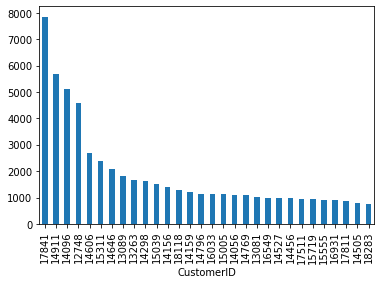

In [14]:
quan_stock_top.plot.bar()
plt.show()

# **Tháng có doanh số cao nhất?**

In [ ]:
gr_month= data.groupby("Month").sum()["TotalCost"]
gr_month

In [ ]:
gr_month.max()

Trực quan totalCost theo month

In [ ]:
months = range(1,13)
plt.bar(months, gr_month, align='center')
plt.xticks(months)
plt.xlabel("Months")
plt.ylabel("TotalCost")

#**Country nào có doanh số cao nhất** 

In [ ]:
gr_country = data.groupby("Country").sum()["TotalCost"]
gr_country.max()
country = [country for country, totalcost in gr_country.items()]

In [ ]:
df= data
df = go.Bar(x = country, y = gr_country,marker={'color': gr_country,'colorscale': 'Viridis'})
layout = go.Layout(title = 'Country')
fig = go.Figure(data=df , layout = layout)
fig.show()

# **Doanh nghiệp nên quảng cáo vào khung giờ nào để tăng doanh thu?**

In [ ]:
gr_hour = data.groupby("Hour").count()["TotalCost"]
gr_hour.max()
hour = [hour for hour, totalcost in gr_hour.items()]


In [ ]:
plt.plot(hour, gr_hour)
plt.grid()
plt.xticks(hour, rotation = 90, size=8)
plt.xlabel("Time")
plt.ylabel("TotalCost")


# **Các sản phẩm nào thường được khách hàng mua kèm với nhau**

In [ ]:
data_dup = data[data["InvoiceNo"].duplicated(keep= False)]
data_dup.head()

In [ ]:
gr_product = lambda product: ','.join(product) 
data_dup["All_Products"]= data_dup.groupby("InvoiceNo")["StockCode"].transform(gr_product)

In [ ]:
data_combo= data_dup[["InvoiceNo","All_Products"]].drop_duplicates()
data_combo.shape

In [ ]:
data_combo["All_Products"].value_counts()

In [ ]:
plt.rcParams['figure.figsize'] = (12, 10)
a = data_combo["All_Products"].value_counts().head(20)
sns.barplot(x = a.values, y = a.index, palette = 'inferno')
plt.title('Top 20 Combo Product', fontsize = 20)
plt.ylabel('Names of Combo Product')
plt.xlabel('Count')
plt.show()

In [ ]:
data_arr= np.array(data_dup[["StockCode","Description"]])
data_arr
b=[]
for i in data_arr:
  if i[0] == "22632" or i[0]=="22633" :
    if i[1] not in b:
      b.append(i[1])
for i in b:
  print(i)

# **Sản phẩm nào bán chạy nhất và tại sao?**

In [ ]:
all_products_pri =  data.groupby("StockCode").mean()["UnitPrice"]
all_products_pri.shape

In [ ]:
all_products= data.groupby("StockCode").sum()['Quantity']
all_products



In [ ]:
product_ls = [StockCode for StockCode, Quantity in all_products.items()]
quan_ls = [int(Quantity) for StockCode, Quantity in all_products.items()]
price_ls = [UnitPrice for StockCode, UnitPrice in all_products_pri.items()]

arr_quan_pro=[]
arr_quan_pro.append(quan_ls)
arr_quan_pro.append(product_ls)
arr_quan_pro.append(price_ls)
all_products.shape

In [ ]:
ind = np.argpartition(arr_quan_pro[0], -10)[-10:]
print(ind[1])
print( "Mã sản phẩm", " | ", "Số lượng đã bán", " |   Giá")
x=y1=y2=[]
for i in ind:
  x.append(arr_quan_pro[1][i])
  y1.append(int(arr_quan_pro[0][i]))
  y2.append(arr_quan_pro[2][i])
  print(arr_quan_pro[1][i], " : \t", arr_quan_pro[0][i], " :      \t",arr_quan_pro[2][i])

In [ ]:
top_10_pro= all_products.sort_values()[3600:]
top_10_pro[-1]

In [ ]:
pro_ls =  [StockCode for StockCode, Quantity in top_10_pro.items()]
pro_ls[-1]

In [ ]:
def Average(lst):
    return sum(lst) / len(lst)

In [ ]:
avg_price=[]
for i in pro_ls:
  temp=[]
  for j in range(len(data["StockCode"])):
    if i == data["StockCode"][j]:
      temp.append(data["UnitPrice"][j])
  avg_price.append(Average(temp))
  


In [ ]:
avg_price[-2]

In [ ]:
x= pro_ls
y1= top_10_pro
y2= avg_price
fig, ax1 = plt.subplots()
ax2= ax1.twinx()
ax1.bar(x, y1, color = "g")
ax2.plot(x, y2, 'b-')

ax1.set_xticklabels(pro_ls, rotation=90, size=8)
ax1.set_xlabel("Products")
ax1.set_ylabel("Quatity")
ax2.set_ylabel("Price Each")
plt.show()

In [ ]:
for i in range(len(data["StockCode"])):
  if data["StockCode"][i] == '23843' :
    print(data["Description"][i])




-----------------------------------------------------------------

---



---



---



---



In [ ]:
plt.rcParams['figure.figsize'] = (15, 5)
data.plot(x = 'InvoiceDate', y = 'TotalCost')
plt.title("Time Series Analysis of Sales", fontsize = 20)
plt.xlabel('Date of Purchase')
plt.ylabel('TotalCost')
plt.show()

Thời gian mua hàng 

In [ ]:
# time-series plot for Australia

dataset = data[data['Country'] == 'Australia']
dataset.plot(x = 'InvoiceDate', y = 'TotalCost')
plt.title('Time-Series for Australia', fontsize = 20)
plt.xlabel('Date of Purchase')
plt.ylabel('TotalCost Amount')
plt.show()

In [ ]:
from wordcloud import WordCloud
from wordcloud import STOPWORDS

stopwords = set(STOPWORDS)
wordcloud = WordCloud(background_color = 'white', width = 900, height = 900).generate(str(data['Description']))

print(wordcloud)
plt.rcParams['figure.figsize'] = (12, 12)
plt.axis('off')
plt.imshow(wordcloud)
plt.title('Most Occuring word in the Description list', fontsize = 20)
plt.show()

In [ ]:
data = [go.Bar(x = data['Country'].unique(), y = data['Country'].value_counts(),marker={'color': data['Country'].value_counts(),'colorscale': 'Viridis'})]
layout = go.Layout(title = 'Country')
fig = go.Figure(data = data, layout = layout)
fig.show()

#Tìm độ chêch lệch trên trục dữ liệu
Thống kê trong 1 ngày, tần số (Frequency) và lần mua gần nhất số lượng bao nhiêu (Recency) và số tiền thu nhập (Monetary) theo khách hàng.

In [26]:
RFM_data = pd.read_csv('/content/drive/MyDrive/python_OP/RMF_data.csv')
RFM_data.pop('Unnamed: 0')
RFM_data.head()


,CustomerID,Recency,Frequency,Monetary,R_score,F_score,M_score,RFM_Group,RFM_Score,RFM_Loyality_level
0,12347.0,2,182,4310.00,1,1,1,111,3,True Lover
1,12348.0,75,31,1797.24,3,3,1,331,7,Flirting
2,12349.0,18,73,1757.55,2,2,1,221,5,True Lover
3,12350.0,310,17,334.40,4,4,3,443,11,Platonic Friend
4,12352.0,36,85,2506.04,2,2,1,221,5,True Lover


In [28]:
fig = px.scatter(RFM_data,x = "Recency", y = "Frequency",color = "RFM_Loyality_level")
fig.show()

# Frequency V/s Monetary
fig = px.scatter(RFM_data,x = "Monetary", y = "Frequency",color = "RFM_Loyality_level")
fig.show()

# Monetary V/s Recency
fig = px.scatter(RFM_data,x = "Monetary", y = "Recency",color = "RFM_Loyality_level")
fig.show()